In [221]:
import folium as fl
import pandas as pd
import sys
import numpy as np
from folium.plugins import BeautifyIcon
from scipy.io import loadmat
import PIL.Image
import matplotlib.pyplot as plt

# https://leaflet-extras.github.io/leaflet-providers/preview/

#!/usr/bin/env python
# -*- coding: utf-8 -*-
sys.getdefaultencoding()

'utf-8'

In [222]:
chosen_stations = ['ANTOKOLSKY', 'HOLON', 'IRONID', 'KVISH4', 'PETAH_TIKVA_ROAD', 'REMEZ',
       'YAD_LEBANIM', 'YEFET_YAFO', 'AHUZA_G', 'ATZMAUT_B', 'KAKAL',
       'KIRYAT_ATA', 'KIRYAT_BIALIK', 'KIRYAT_BINYAMIN', 'KIRYAT_TIVON',
       'NAVE_SHANAAN', 'NESHER', 'BAR_ILAN', 'EFRATA', 'NAVE_ILAN',
       'ASHDOD_IGUD', 'ASHKELON_SOUTH', 'DALYA', 'GEDERA', 'GVARAAM',
       'KIRYAT_MALAHI', 'NIR_ISRAEL', 'ORT', 'ROVA_TV', 'SDEROT', 'SDE_YOAV',
       'YAHALOM', 'BEER_SHEVA', 'EAST_NEGEV', 'KFAR_MASARIK', 'HEFZIBA',
       'PARDES_HANA', 'RAANANA']

# # this is the 33 original stations that were chosen
# stations = pd.read_csv("/Users/iditbela/Documents/Broday/saved_data_from_notebooks/stations_info.csv") 
stackLocations = pd.read_pickle('/Users/iditbela/Documents/Broday/saved_data_from_notebooks/stackLocations')

# stations.head(1)

# stackLocations.head(1)

PM25_dict = loadmat('/Users/iditbela/Documents/Broday/sent_from_Yuval/Mon_DataBase/LoadDataVar_PM25_2000#2019.mat')

columns = PM25_dict['StNames']

col_list = []
for c in columns:
    col_list.append(c[0][0])
np.shape(col_list)

# all stations
all_StationsInfo = loadmat('/Users/iditbela/Documents/Broday/sent_from_Yuval/Mon_DataBase/StationInfo.mat')

np.argwhere(all_StationsInfo['Titles_StaInfo']=='Name')[0][1]

np.argwhere(all_StationsInfo['Titles_StaInfo']=='Long')[0][1]

np.argwhere(all_StationsInfo['Titles_StaInfo']=='Lat')[0][1]

all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==col_list[0])[0][0],[1,6,7]][0][0]

names = []
X = []
Y = []
lats = []
lons = []
region = []
Type = []
HASL = []
HAGL = []
for st in col_list:
    names.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],1][0])
    X.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],4][0][0])
    Y.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],5][0][0])
    lons.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],6][0][0])
    lats.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],7][0][0])
    region.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],2][0])
    Type.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],3][0])
    HASL.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],8][0][0])
    HAGL.append(all_StationsInfo['StaInfo'][np.argwhere(all_StationsInfo['StaInfo'][:,1]==st)[0][0],9][0][0])

# all_stations = pd.DataFrame(np.array([names,region,Type,HASL,HAGL,lats,lons,X,Y]).T,columns = ['Name','Region','Type','Height a.s.l [m]','Height a.g.l [m]','Lat','Lon','X','Y'])
all_stations = pd.DataFrame(np.array([names,region,Type,HASL,HAGL,lats,lons]).T,columns = ['Name','Region','Type','Height a.s.l [m]','Height a.g.l [m]','Lat','Lon'])

all_stations

# all_stations.to_csv('/Users/iditbela/Documents/Broday/sent_from_Yuval/Mon_DataBase/allStationsInfo.csv')

all_stations[all_stations.Name=='AFULA']

# tiles: https://leaflet-extras.github.io/leaflet-providers/preview/

m = fl.Map(
#     location = [float(np.min(all_stations.Lat))+0.7,float(np.min(all_stations.Lon))+0.4],
    location = [31.95,34.9],
    width='25%',
    height='80%',
    zoom_start=8, 
    control_scale = True,
    fill_opacity=0.9,
    tiles='https://{s}.basemaps.cartocdn.com/rastertiles/voyager/{z}/{x}/{y}{r}.png',
#     tiles='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
#     tiles='https://server.arcgisonline.com/ArcGIS/rest/services/Specialty/DeLorme_World_Base_Map/MapServer/tile/{z}/{y}/{x}',
    attr=' ') #tiles='stamenterrain'
# m.fit_bounds([(stations.Lat.min(),stations.Lon.min(),stations.Lat.max(),stations.Lon.max())])

all_stations[all_stations.Name == 'PETAH_TIKVA_ROAD']
# all_stations[all_stations.Name == 'REMEZ']

# all stations - blue
for station in all_stations.itertuples():
    if station.Lon=='nan':
        continue
    fl.Marker((station.Lat, station.Lon),popup=station.Name, icon=BeautifyIcon(border_width=3, icon_shape='circle-dot',border_color='blue')).add_to(m)

# chosen_stations
stations = all_stations[all_stations.Name.isin(chosen_stations)]
stations.reset_index(drop=True,inplace=True)

for station in stations.itertuples():
    fl.Marker((station.Lat, station.Lon),popup=station.Name, icon=BeautifyIcon(border_width=3, icon_shape='circle-dot',border_color='red',prefix='fa')).add_to(m)

for sn in stackLocations.itertuples():
    if (sn.stack_name_eng =='IEC Rabin' or sn.stack_name_eng =='IEC Rotenberg'):
        fl.Marker((sn.Lat, sn.Lon),popup=sn.stack_name_eng +' '+ str(np.round(sn.mean_hourly_emission_rate,1)),
                  icon=BeautifyIcon(icon='star',
                    inner_icon_style='color:green;font-size:15px;',
                    background_color='transparent',
                    border_color='transparent')).add_to(m)
        
        
        

In [223]:
m

In [126]:
# stations.to_csv("/Users/iditbela/Documents/Broday/saved_data_from_notebooks/stations_info_38.csv")

In [127]:
# stackLocations

In [128]:
stations.loc[stations['Region'].isin(['GUD']),'Region']='GD'
stations.loc[stations['Region'].isin(['HAI']),'Region']='HBA'
stations.loc[stations['Region'].isin(['JER']),'Region']='Jerusalem'
stations.loc[stations['Region'].isin(['MHD']),'Region']='SCP'
stations.loc[stations['Region'].isin(['NGV']),'Region']='Negev'
stations.loc[stations['Region'].isin(['NOR']),'Region']='HBA'
stations.loc[stations['Region'].isin(['SHC']),'Region']='SHCP'


stations.loc[stations['Type'].isin(['Gener']),'Type']='General'
stations.loc[stations['Type'].isin(['Trans']),'Type']='Transportation'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [129]:
# small things
stations.loc[stations['Name'].isin(['YAD_LEBANIM']),'Height a.g.l [m]']=17.8
stations.loc[stations['Name'].isin(['NAVE_ILAN']),'Height a.g.l [m]']='NA'
stations.loc[stations['Name'].isin(['DALYA']),'Height a.g.l [m]']='NA'
stations.index.name = 'No.'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [130]:
# add statistics on station (mean, median, std)
df_statistics = pd.read_pickle(('~/Documents/Broday/saved_data_from_notebooks/stations_statistics'))

In [131]:
stations['mean $[\mu g/m^{3}]$'] = df_statistics['mean']
stations['median $[\mu g/m^{3}]$'] = df_statistics['median']
stations['std $[\mu g/m^{3}]$'] = df_statistics['std']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [132]:
stations

,Name,Region,Type,Height a.s.l [m],Height a.g.l [m],Lat,Lon,mean $[\mu g/m^{3}]$,median $[\mu g/m^{3}]$,std $[\mu g/m^{3}]$
No.,,,,,,,,,,
0,ANTOKOLSKY,GD,General,19,12,32.084283,34.782699,20,16.8,20.5
1,HOLON,GD,General,24,15.8,32.018216,34.768924,20.5,17,20.1
2,IRONID,GD,Transportation,12,3.8,32.093806,34.790918,21.2,17.8,21.2
3,KVISH4,GD,Transportation,50,3.8,32.071229,34.842215,23.3,19.9,22.4
4,PETAH_TIKVA_ROAD,GD,General,28,22,32.062234,34.777346,21.2,18.3,17.8
5,REMEZ,GD,Transportation,19,3.8,32.092159,34.826857,23.5,19.3,25.3
6,YAD_LEBANIM,GD,General,77,17.8,32.075956,34.821512,19.7,16.7,22.4
7,YEFET_YAFO,GD,Transportation,25,3.8,32.049749,34.752818,22.7,19.8,16.6
8,AHUZA_G,HBA,General,280,22,32.78604,34.986144,17.2,14.3,24.3


In [133]:
d = dict(selector="th",
    props=[('text-align', 'center')])

stations.style.set_precision(1).set_properties(**{'width':'11em', 'text-align':'center'})\
        .set_table_styles([d])  

,Name,Region,Type,Height a.s.l [m],Height a.g.l [m],Lat,Lon,mean $[\mu g/m^{3}]$,median $[\mu g/m^{3}]$,std $[\mu g/m^{3}]$
No.,,,,,,,,,,
0,ANTOKOLSKY,GD,General,19,12,32.084283,34.782699,20.0,16.8,20.5
1,HOLON,GD,General,24,15.8,32.018216,34.768924,20.5,17.0,20.1
2,IRONID,GD,Transportation,12,3.8,32.093806,34.790918,21.2,17.8,21.2
3,KVISH4,GD,Transportation,50,3.8,32.071229,34.842215,23.3,19.9,22.4
4,PETAH_TIKVA_ROAD,GD,General,28,22,32.062234,34.777346,21.2,18.3,17.8
5,REMEZ,GD,Transportation,19,3.8,32.092159,34.826857,23.5,19.3,25.3
6,YAD_LEBANIM,GD,General,77,17.8,32.075956,34.821512,19.7,16.7,22.4
7,YEFET_YAFO,GD,Transportation,25,3.8,32.049749,34.752818,22.7,19.8,16.6
8,AHUZA_G,HBA,General,280,22,32.78604,34.986144,17.2,14.3,24.3


In [137]:
def render_mpl_table(data, col_width=3, row_height=0.625, font_size=16,
                     header_color='#40406f', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)# rowLabels=data.index,
#     w, h = mpl_table[0,1].get_width(), mpl_table[0,1].get_height()
#     mpl_table.add_cell(0, -1, w,h, text=data.index.name)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

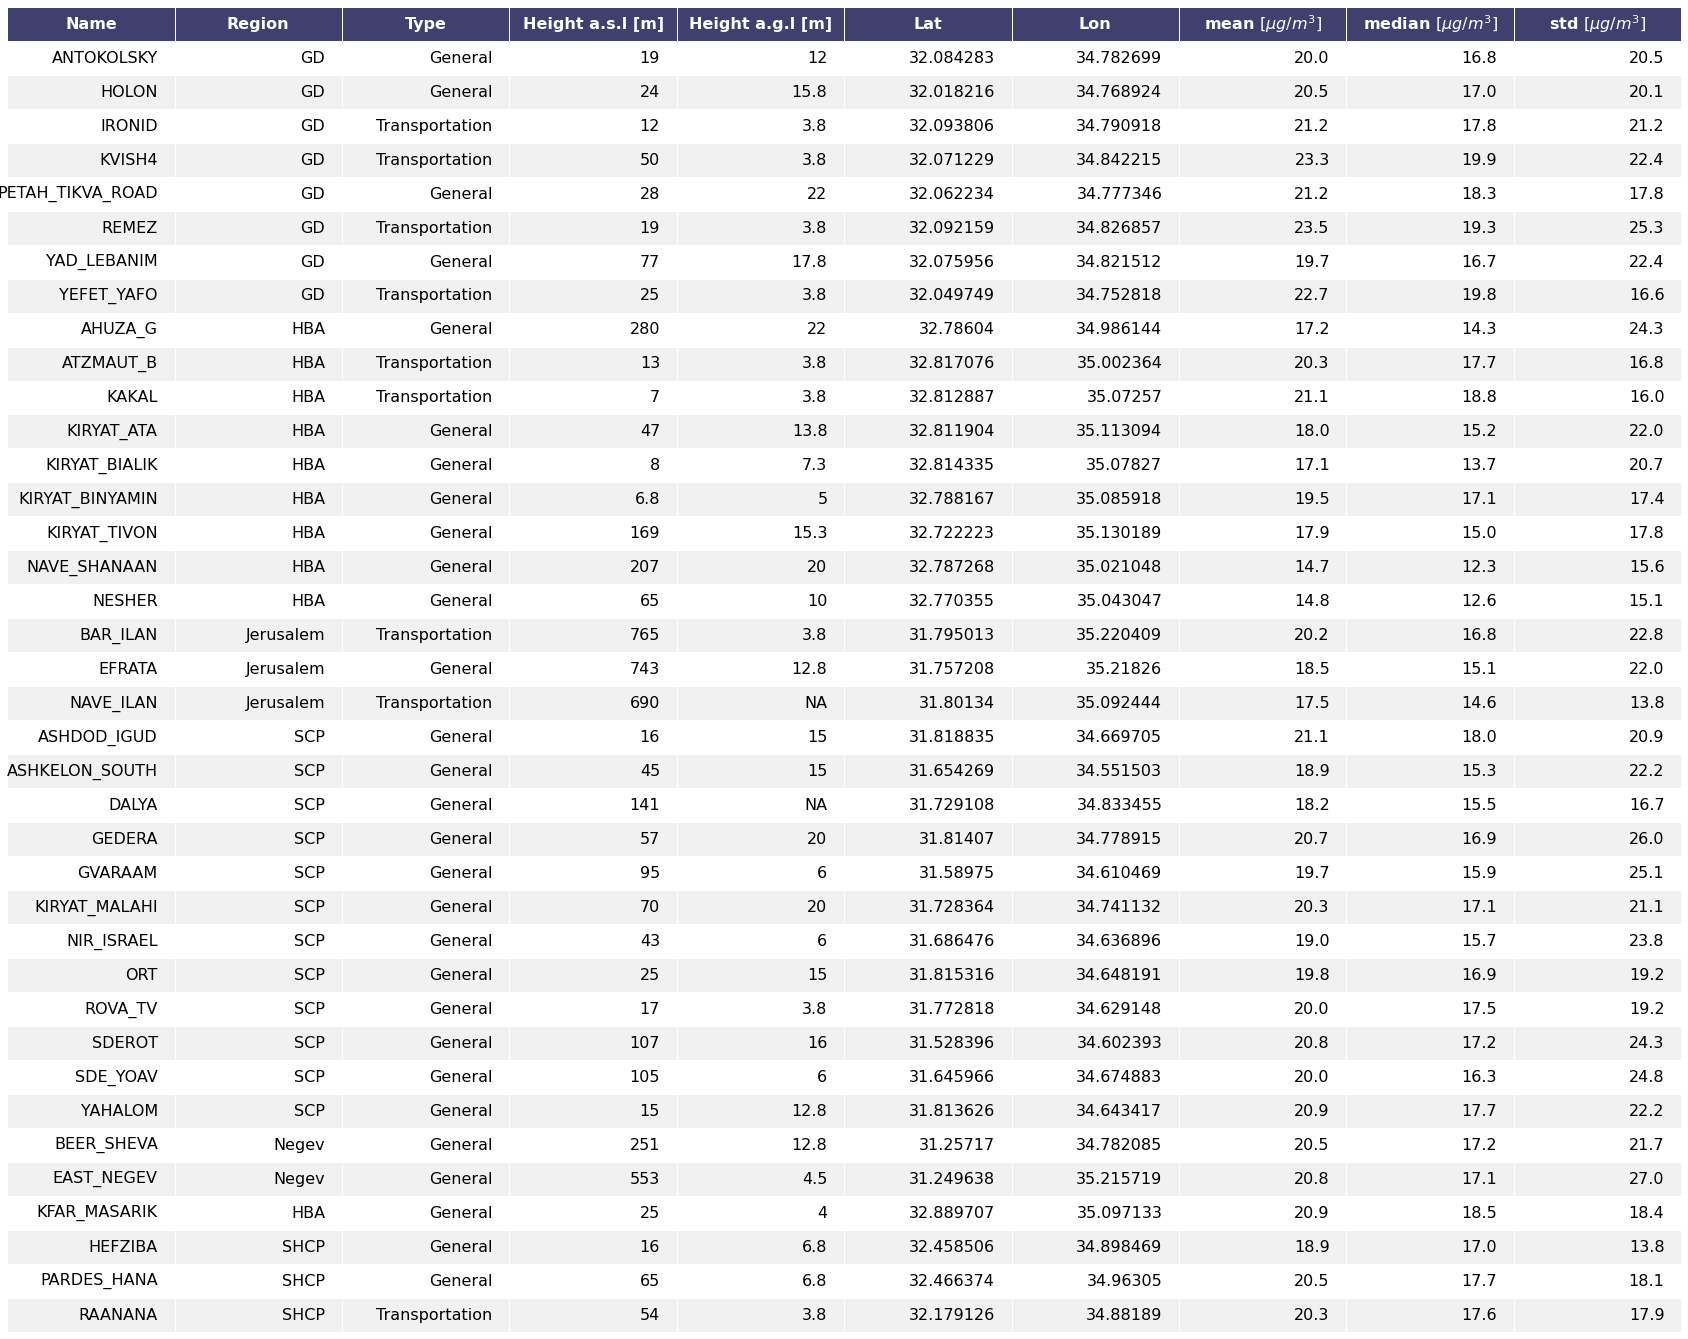

In [139]:
fig,ax = render_mpl_table(stations, header_columns=0, col_width=3)
# fig.savefig("/Users/iditbela/Documents/Broday/Broday_proposals/figures/stations_table.png",dpi=500)

In [62]:
# import selenium

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.firefox.firefox_binary import FirefoxBinary

# binary = FirefoxBinary('path/to/installed firefox binary')
# browser = webdriver.Firefox(firefox_binary=binary)
# browser = webdriver.Firefox()

In [62]:
# img_data = m._to_png(10)
# img = Image.open(io.BytesIO(img_data))
# img.save('image.png')

In [222]:
# YAD_LABANIM was removed
# stations

# PHOTOSHOP FOR TABLES/PLOT

In [170]:
IL = [0.5,1,6,24,168,720,'ALL','ALL']
ALGO = ['stkNN_ll','stkNN_ll','iiET','iiET','iiET','iiET','iiET','iiET & stkNN'] 

In [171]:
arrays = [IL, ALGO]
my_index = pd.MultiIndex.from_arrays(arrays, names=('number', 'color'))

In [172]:
final = pd.DataFrame([[6.26,4.09,0.92,-0.44],
[6.44,4.41,0.90,-0.46],
[7.70,5.25,0.74,0.02],
[7.29,4.87,0.64,-0.08],
[6.57,4.81,0.61,0.37],
[6.04,4.54,0.66,0.49],
[7.74,5.15,0.81,0.11],
[7.55,4.87,0.83,0.01]],columns=['a','b','c','d'],index=my_index)

In [173]:
final.index.names = ['$Interval Length$','$Algorithm$']

In [174]:
final.columns = ['$RMSE~[\mu g/m^3]$','$Mean~error~[\mu g/m^3]$','$R^2$','$Mean~bias~[\mu g/m^3]$']

In [175]:
d = dict(selector="th",
    props=[('text-align', 'center')])

final.style.set_precision(2).set_properties(**{'width':'5em', 'text-align':'center'})\
        .set_table_styles([d])  

In [152]:
# [[6.26,4.09,0.92,-0.44],
# [6.44,4.41,0.90,-0.46],
# [7.70,5.25,0.74,0.02],
# [7.29,4.87,0.64,-0.08],
# [6.57,4.81,0.61,0.37],
# [6.04,4.54,0.66,0.49],
# [7.74,5.15,0.81,0.11],
# [7.55,4.87,0.83,0.01]]

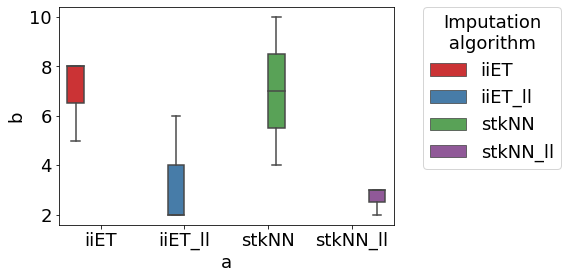

In [220]:
ALGO = ['iiET','iiET_ll','stkNN','stkNN_ll','iiET','iiET_ll','stkNN','stkNN_ll','iiET','iiET_ll','stkNN','stkNN_ll'] 
df = pd.DataFrame({'a' : ALGO, 'b' : [5, 6, 4, 3, 8, 2, 10, 3,8, 2, 7, 2] })

# horizontal boxplots

fig,ax = plt.subplots()
sns.boxplot(x="a", y="b",hue="a", data=df, orient='v',palette="Set1")
handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles, labels, bbox_to_anchor=(1.5, 1), loc='upper right', ncol=1, borderaxespad=0.,title = 'Imputation\n algorithm',title_fontsize=18)

# plt.savefig("/Users/iditbela/Documents/Broday/saved_data_from_notebooks/legend_validation_results_imputation.png", dpi=500, bbox_inches="tight")